In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

### Load watermasks for pre- and post-September 2011 HRDPS grid

In [2]:
Watermask1 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_pre_22sep11.nc')
Watermask2 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_22sep11_onward.nc')

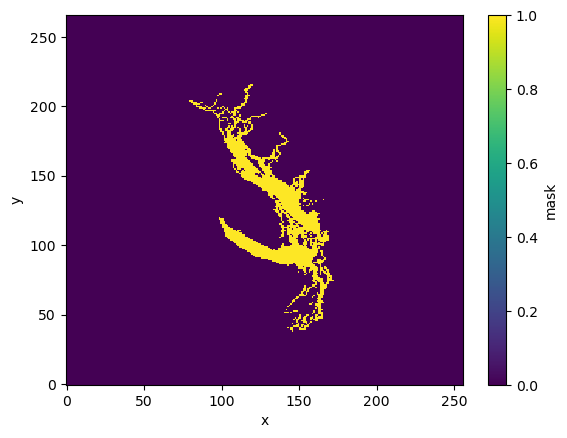

In [3]:
Watermask1.mask.plot() # Check that the mask works

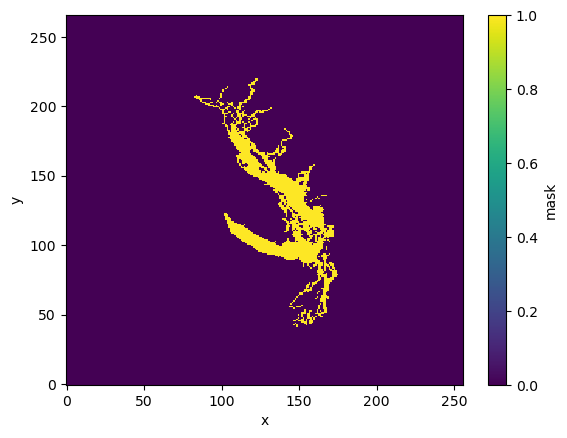

In [4]:
Watermask2.mask.plot() # Check that watermask2 works

### Get grid corners for Strait of Georgia (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


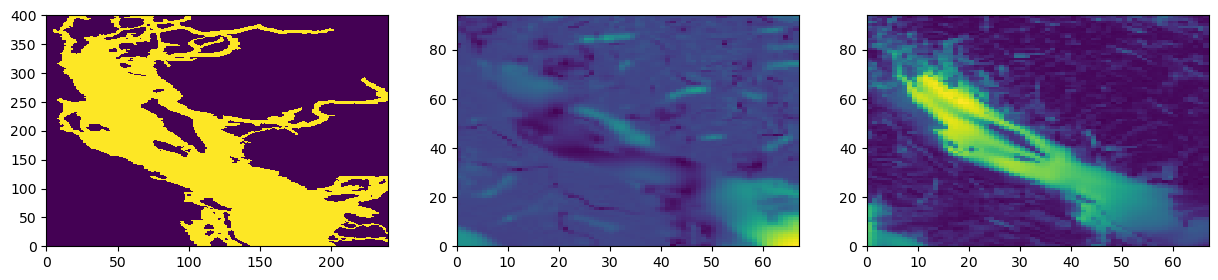

In [6]:
## because grids changed September 22, 2011

fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(1/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(1/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(1/2))
    print(g.variables['u_wind'])

In [7]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

### Find the closest ji model points for each of the grids (ops, gl1, gl2)

In [8]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(119, 121) (134, 163) (200, 96) (213, 136)


In [9]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(114, 121) (132, 161) (189, 96) (202, 134)


In [10]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [11]:
# ops: use j: 119:213, i: 96:163
# gl1: use j: 114:202, i: 96:161
# gl2: use j: 117:205, i: 99:163

### Get Wind Variables

In [12]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(114,202)
        ilims=(96,161)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

/tmp/ipykernel_1807168/3000062760.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


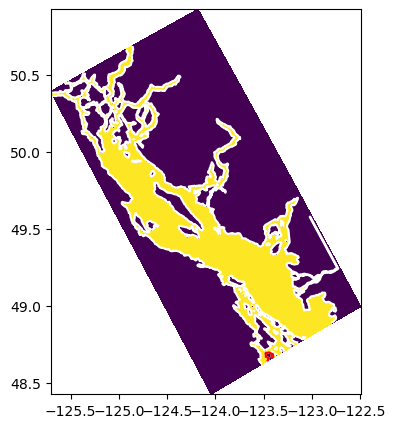

In [13]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

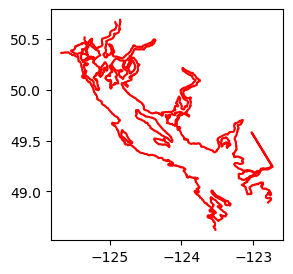

In [14]:
## Plot the gridlines
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

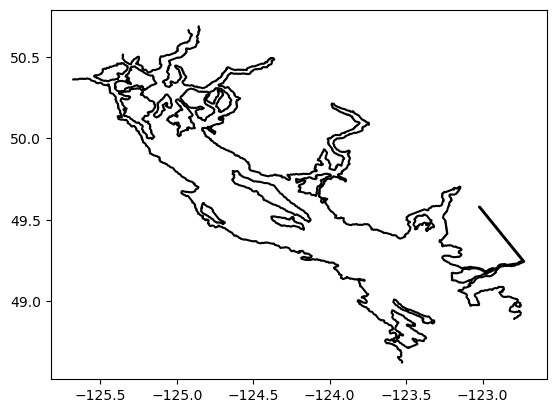

In [15]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [16]:
# Get the gridlines for ops
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [17]:
# Get the gridlines for gl1
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [18]:
# Get the gridlines for gl2
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [19]:
# extract March mean wind from one of each type of file to test:
## ops, 2015
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(1/2) ## use 3/2 to get wind speed cubed
U3opsmean=np.mean(U3ops,0)

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl1=(fu**2+fv**2)**(1/2)
U3gl1mean=np.mean(U3gl1,0)

## gl2, 2012
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(1/2)
U3gl2mean=np.mean(U3gl2,0)

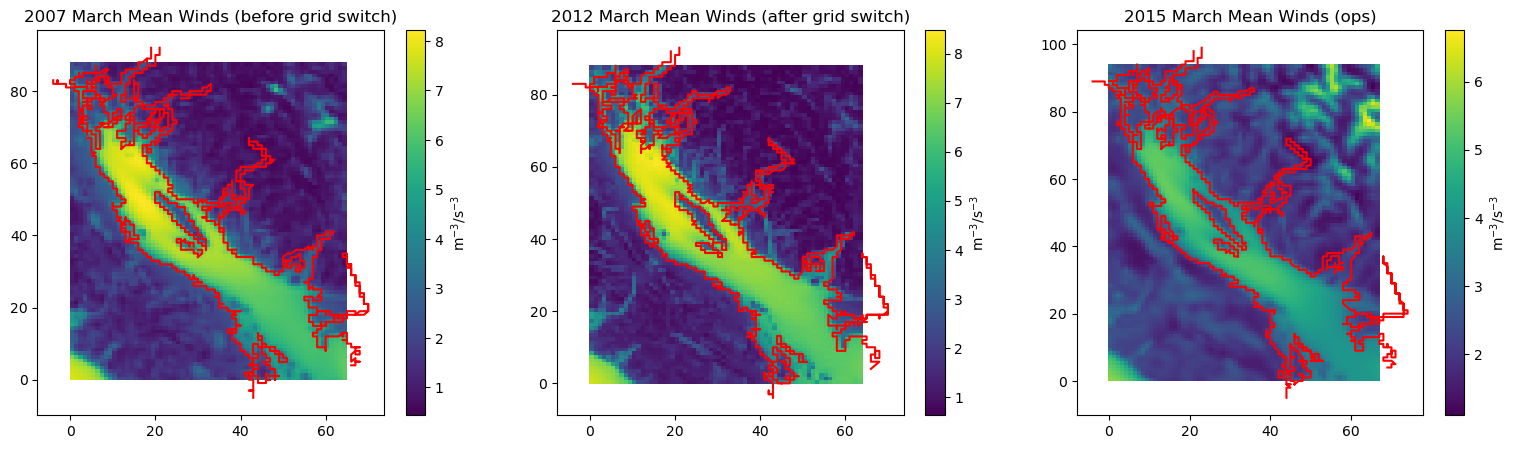

In [20]:
# Plot the wind speed with gridlines to check that the grids are correct

fig,ax=plt.subplots(1,3,figsize=(19,5))


iax=ax[0]
iax.set_title('2007 March Mean Winds (before grid switch)')
m=iax.pcolormesh(U3gl1mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[1]
iax.set_title('2012 March Mean Winds (after grid switch)')
m=iax.pcolormesh(U3gl2mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[2]
iax.set_title('2015 March Mean Winds (ops)')
m=iax.pcolormesh(U3opsmean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')


## Test to make sure the land mask works

In [21]:
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,2),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1]))for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
test=(fu**2+fv**2)**(1/2)
testmean=np.mean(test,0)

#
#.where(HRDPS.landmask)

In [22]:
test2008=np.nanmean(testmean)

In [23]:
fu.shape

(24, 88, 65)

In [24]:
fs[0]['u_wind'].shape

(24, 266, 256)

In [25]:
Watermask1.mask.shape

(266, 256)

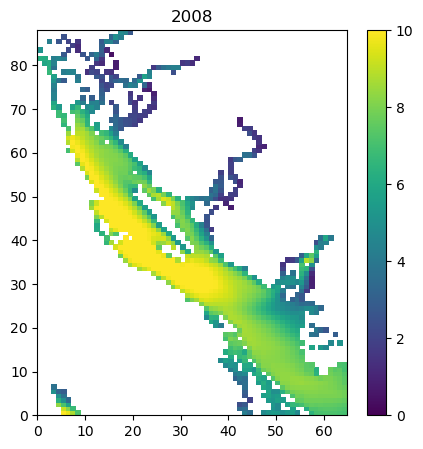

In [26]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
vmin=0
vmax=10

iax=ax
iax.set_title('2008')
m=iax.pcolormesh(testmean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

## January

In [27]:
# extract January mean wind from one of each type of file:

# There are no data for January 2007
#day=dt.datetime(year,1,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#gl12007=(fu**2+fv**2)**(1/2)
#margl12007mean=np.mean(gl12007,0)

##
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2008=(fujan2008**2+fvjan2008**2)**(1/2)
jan_ws2008mean=np.mean(jan_ws2008,0)


##
year=2009
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2009=(fujan2009**2+fvjan2009**2)**(1/2)
jan_ws2009mean=np.mean(jan_ws2009,0)


##
year=2010
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2010=(fujan2010**2+fvjan2010**2)**(1/2)
jan_ws2010mean=np.mean(jan_ws2010,0)


##
year=2011
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2011=(fujan2011**2+fvjan2011**2)**(1/2)
jan_ws2011mean=np.mean(jan_ws2011,0)


##
year=2012
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2012=(fujan2012**2+fvjan2012**2)**(1/2)
jan_ws2012mean=np.mean(jan_ws2012,0)


##
year=2013
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2013=(fujan2013**2+fvjan2013**2)**(1/2)
jan_ws2013mean=np.mean(jan_ws2013,0)


##
year=2014
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2014=(fujan2014**2+fvjan2014**2)**(1/2)
jan_ws2014mean=np.mean(jan_ws2014,0)


##
year=2015
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2015=(fujan2015**2+fvjan2015**2)**(1/2)
jan_ws2015mean=np.mean(jan_ws2015,0)


##
year=2016
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2016=(fujan2016**2+fvjan2016**2)**(1/2)
jan_ws2016mean=np.mean(jan_ws2016,0)


##
year=2017
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2017=(fujan2017**2+fvjan2017**2)**(1/2)
jan_ws2017mean=np.mean(jan_ws2017,0)


##
year=2018
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2018=(fujan2018**2+fvjan2018**2)**(1/2)
jan_ws2018mean=np.mean(jan_ws2018,0)


##
year=2019
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2019=(fujan2019**2+fvjan2019**2)**(1/2)
jan_ws2019mean=np.mean(jan_ws2019,0)


##
year=2020
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2020=(fujan2020**2+fvjan2020**2)**(1/2)
jan_ws2020mean=np.mean(jan_ws2020,0)


In [28]:
# Get the mean wind speed for entire model area
#Jan2007=np.nanmean(jan_gl12007mean)
Jan2008=np.nanmean(jan_ws2008mean)
Jan2009=np.nanmean(jan_ws2009mean)
Jan2010=np.nanmean(jan_ws2010mean)
Jan2011=np.nanmean(jan_ws2011mean)
Jan2012=np.nanmean(jan_ws2012mean)
Jan2013=np.nanmean(jan_ws2013mean)
Jan2014=np.nanmean(jan_ws2014mean)
Jan2015=np.nanmean(jan_ws2015mean)
Jan2016=np.nanmean(jan_ws2016mean)
Jan2017=np.nanmean(jan_ws2017mean)
Jan2018=np.nanmean(jan_ws2018mean)
Jan2019=np.nanmean(jan_ws2019mean)
Jan2020=np.nanmean(jan_ws2020mean)

Text(0.5, 0.98, 'January Mean Wind Speed')

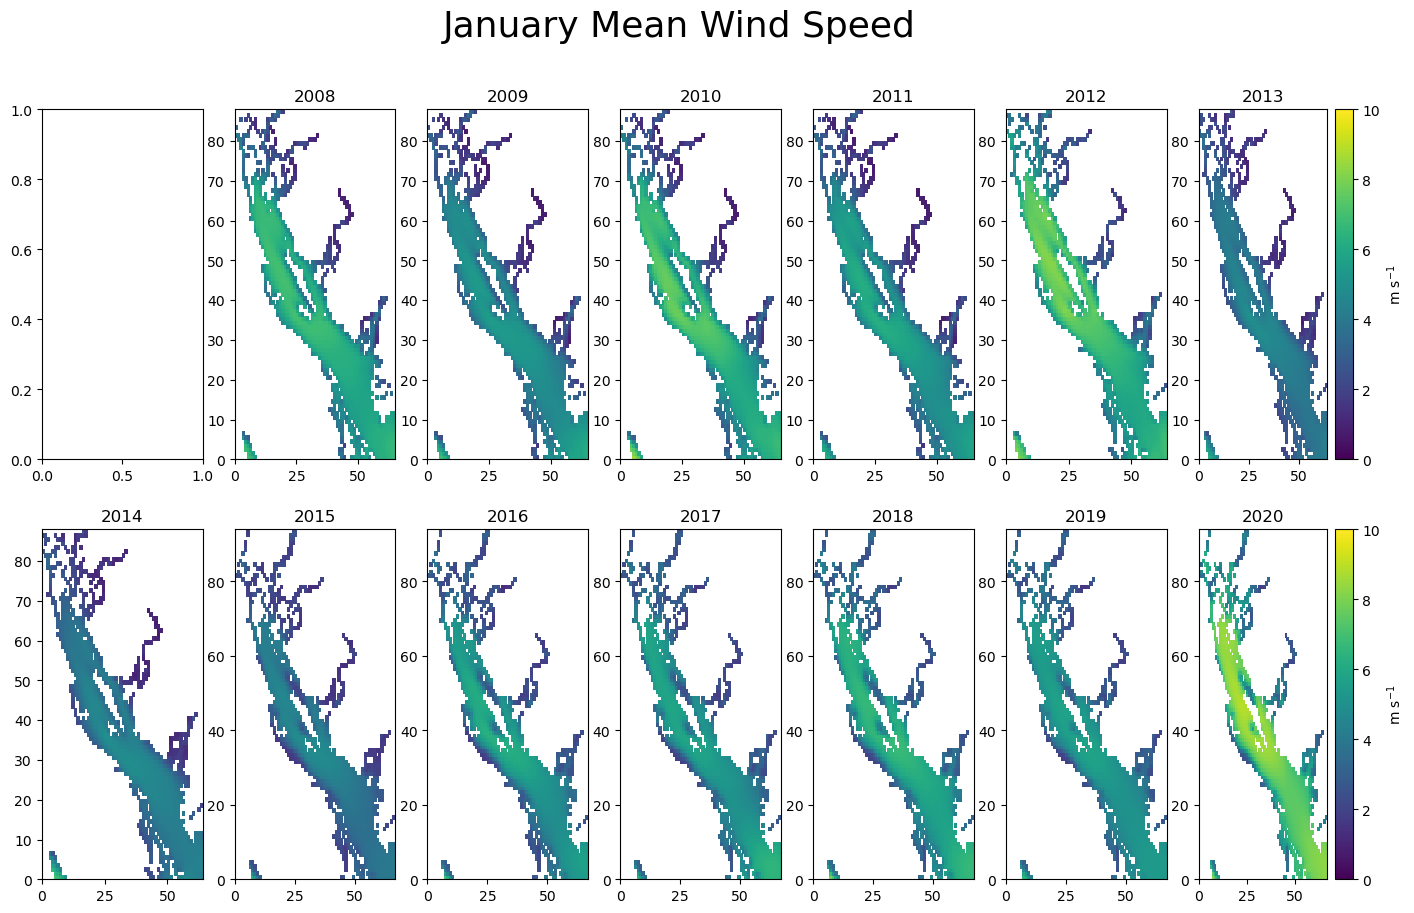

In [30]:
### Plot January winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

#iax=ax[0,0]
#iax.set_title('2007')
#m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jan_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jan_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jan_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jan_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jan_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jan_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jan_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jan_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jan_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jan_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jan_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jan_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jan_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('January Mean Wind Speed',fontsize=26)

## February

In [31]:
# extract February mean wind from one of each type of file:

year=2007
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2007=(fufeb2007**2+fvfeb2007**2)**(1/2)
feb_ws2007mean=np.mean(feb_ws2007,0)



year=2008
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2008=(fufeb2008**2+fvfeb2008**2)**(1/2)
feb_ws2008mean=np.mean(feb_ws2008,0)



year=2009
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2009=(fufeb2009**2+fvfeb2009**2)**(1/2)
feb_ws2009mean=np.mean(feb_ws2009,0)



year=2010
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2010=(fufeb2010**2+fvfeb2010**2)**(1/2)
feb_ws2010mean=np.mean(feb_ws2010,0)



year=2011
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2011=(fufeb2011**2+fvfeb2011**2)**(1/2)
feb_ws2011mean=np.mean(feb_ws2011,0)



year=2012
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2012=(fufeb2012**2+fvfeb2012**2)**(1/2)
feb_ws2012mean=np.mean(feb_ws2012,0)



year=2013
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2013=(fufeb2013**2+fvfeb2013**2)**(1/2)
feb_ws2013mean=np.mean(feb_ws2013,0)



year=2014
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2014=(fufeb2014**2+fvfeb2014**2)**(1/2)
feb_ws2014mean=np.mean(feb_ws2014,0)



year=2015
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2015=(fufeb2015**2+fvfeb2015**2)**(1/2)
feb_ws2015mean=np.mean(feb_ws2015,0)



year=2016
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2016=(fufeb2016**2+fvfeb2016**2)**(1/2)
feb_ws2016mean=np.mean(feb_ws2016,0)



year=2017
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2017=(fufeb2017**2+fvfeb2017**2)**(1/2)
feb_ws2017mean=np.mean(feb_ws2017,0)



year=2018
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2018=(fufeb2018**2+fvfeb2018**2)**(1/2)
feb_ws2018mean=np.mean(feb_ws2018,0)



year=2019
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2019=(fufeb2019**2+fvfeb2019**2)**(1/2)
feb_ws2019mean=np.mean(feb_ws2019,0)



year=2020
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2020=(fufeb2020**2+fvfeb2020**2)**(1/2)
feb_ws2020mean=np.mean(feb_ws2020,0)


In [32]:
Feb2007=np.nanmean(feb_ws2007mean)
Feb2008=np.nanmean(feb_ws2008mean)
Feb2009=np.nanmean(feb_ws2009mean)
Feb2010=np.nanmean(feb_ws2010mean)
Feb2011=np.nanmean(feb_ws2011mean)
Feb2012=np.nanmean(feb_ws2012mean)
Feb2013=np.nanmean(feb_ws2013mean)
Feb2014=np.nanmean(feb_ws2014mean)
Feb2015=np.nanmean(feb_ws2015mean)
Feb2016=np.nanmean(feb_ws2016mean)
Feb2017=np.nanmean(feb_ws2017mean)
Feb2018=np.nanmean(feb_ws2018mean)
Feb2019=np.nanmean(feb_ws2019mean)
Feb2020=np.nanmean(feb_ws2020mean)

Text(0.5, 0.98, 'February Mean Wind Speed')

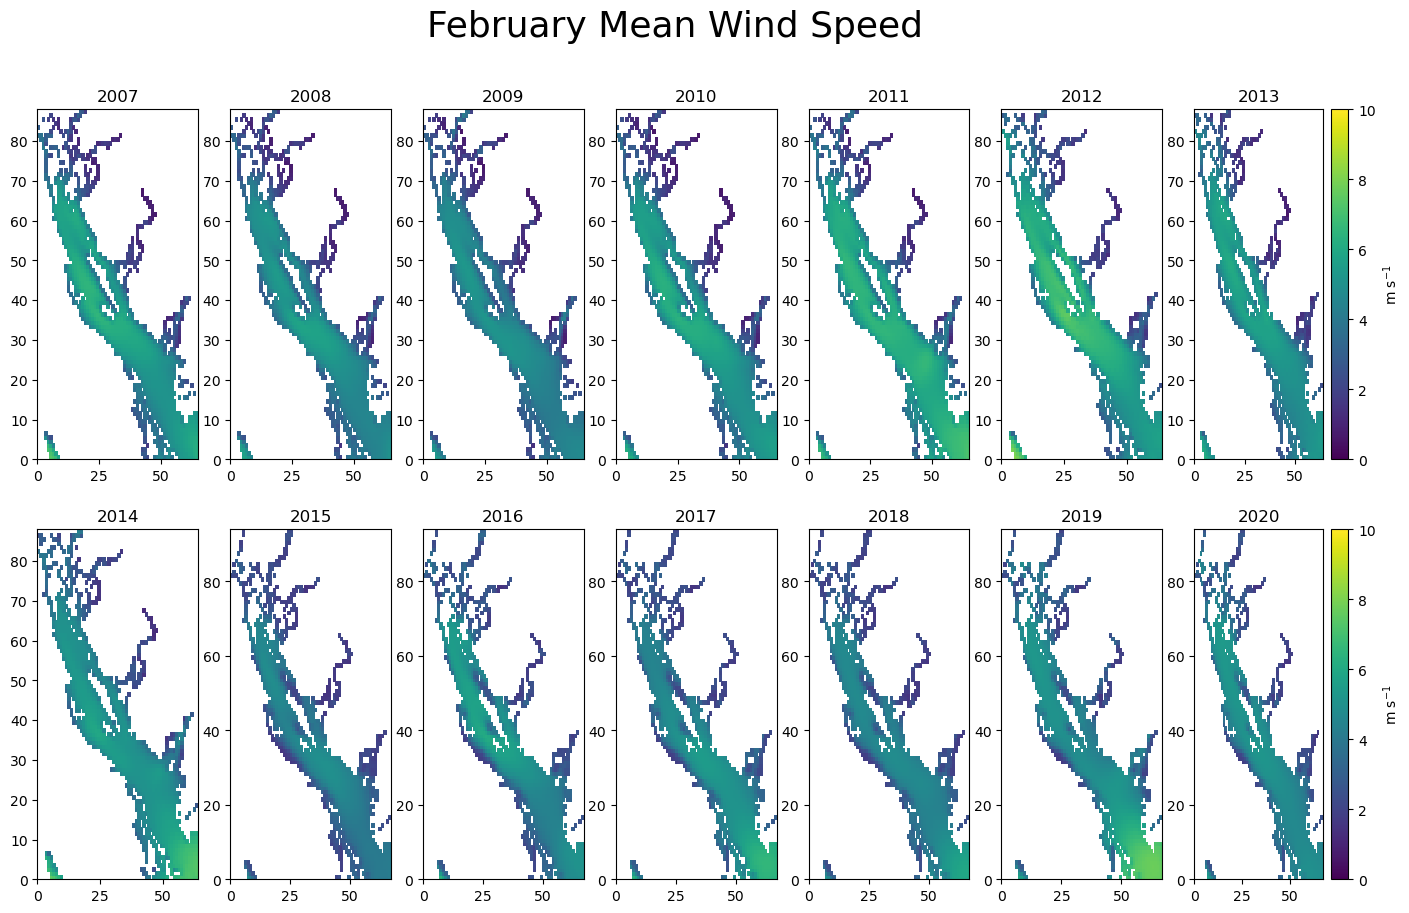

In [33]:
### Plot February winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(feb_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(feb_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(feb_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(feb_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(feb_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(feb_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(feb_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(feb_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(feb_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(feb_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(feb_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(feb_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(feb_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(feb_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('February Mean Wind Speed',fontsize=26)

## March

In [36]:
# extract March mean wind from one of each type of file:

## 
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2007=(fumar2007**2+fvmar2007**2)**(1/2)
mar_ws2007mean=np.mean(mar_ws2007,0)


## 
year=2008
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2008=(fumar2008**2+fvmar2008**2)**(1/2)
mar_ws2008mean=np.mean(mar_ws2008,0)


## 
year=2009
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2009=(fumar2009**2+fvmar2009**2)**(1/2)
mar_ws2009mean=np.mean(mar_ws2009,0)


## 
year=2010
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2010=(fumar2010**2+fvmar2010**2)**(1/2)
mar_ws2010mean=np.mean(mar_ws2010,0)


## 
year=2011
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2011=(fumar2011**2+fvmar2011**2)**(1/2)
mar_ws2011mean=np.mean(mar_ws2011,0)


## 
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2012=(fumar2012**2+fvmar2012**2)**(1/2)
mar_ws2012mean=np.mean(mar_ws2012,0)


## 
year=2013
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2013=(fumar2013**2+fvmar2013**2)**(1/2)
mar_ws2013mean=np.mean(mar_ws2013,0)


## 
year=2014
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2014=(fumar2014**2+fvmar2014**2)**(1/2)
mar_ws2014mean=np.mean(mar_ws2014,0)


## 
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2015=(fumar2015**2+fvmar2015**2)**(1/2)
mar_ws2015mean=np.mean(mar_ws2015,0)


## 
year=2016
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2016=(fumar2016**2+fvmar2016**2)**(1/2)
mar_ws2016mean=np.mean(mar_ws2016,0)


## 
year=2017
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2017=(fumar2017**2+fvmar2017**2)**(1/2)
mar_ws2017mean=np.mean(mar_ws2017,0)


## 
year=2018
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2018=(fumar2018**2+fvmar2018**2)**(1/2)
mar_ws2018mean=np.mean(mar_ws2018,0)


## 
year=2019
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2019=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2019=(fumar2019**2+fvmar2019**2)**(1/2)
mar_ws2019mean=np.mean(mar_ws2019,0)


## 
year=2020
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2020=(fumar2020**2+fvmar2020**2)**(1/2)
mar_ws2020mean=np.mean(mar_ws2020,0)


In [38]:
Mar2007=np.nanmean(mar_ws2007mean)
Mar2008=np.nanmean(mar_ws2008mean)
Mar2009=np.nanmean(mar_ws2009mean)
Mar2010=np.nanmean(mar_ws2010mean)
Mar2011=np.nanmean(mar_ws2011mean)
Mar2012=np.nanmean(mar_ws2012mean)
Mar2013=np.nanmean(mar_ws2013mean)
Mar2014=np.nanmean(mar_ws2014mean)
Mar2015=np.nanmean(mar_ws2015mean)
Mar2016=np.nanmean(mar_ws2016mean)
Mar2017=np.nanmean(mar_ws2017mean)
Mar2018=np.nanmean(mar_ws2018mean)
Mar2019=np.nanmean(mar_ws2019mean)
Mar2020=np.nanmean(mar_ws2020mean)

Text(0.5, 0.98, 'March Mean Wind Speed')

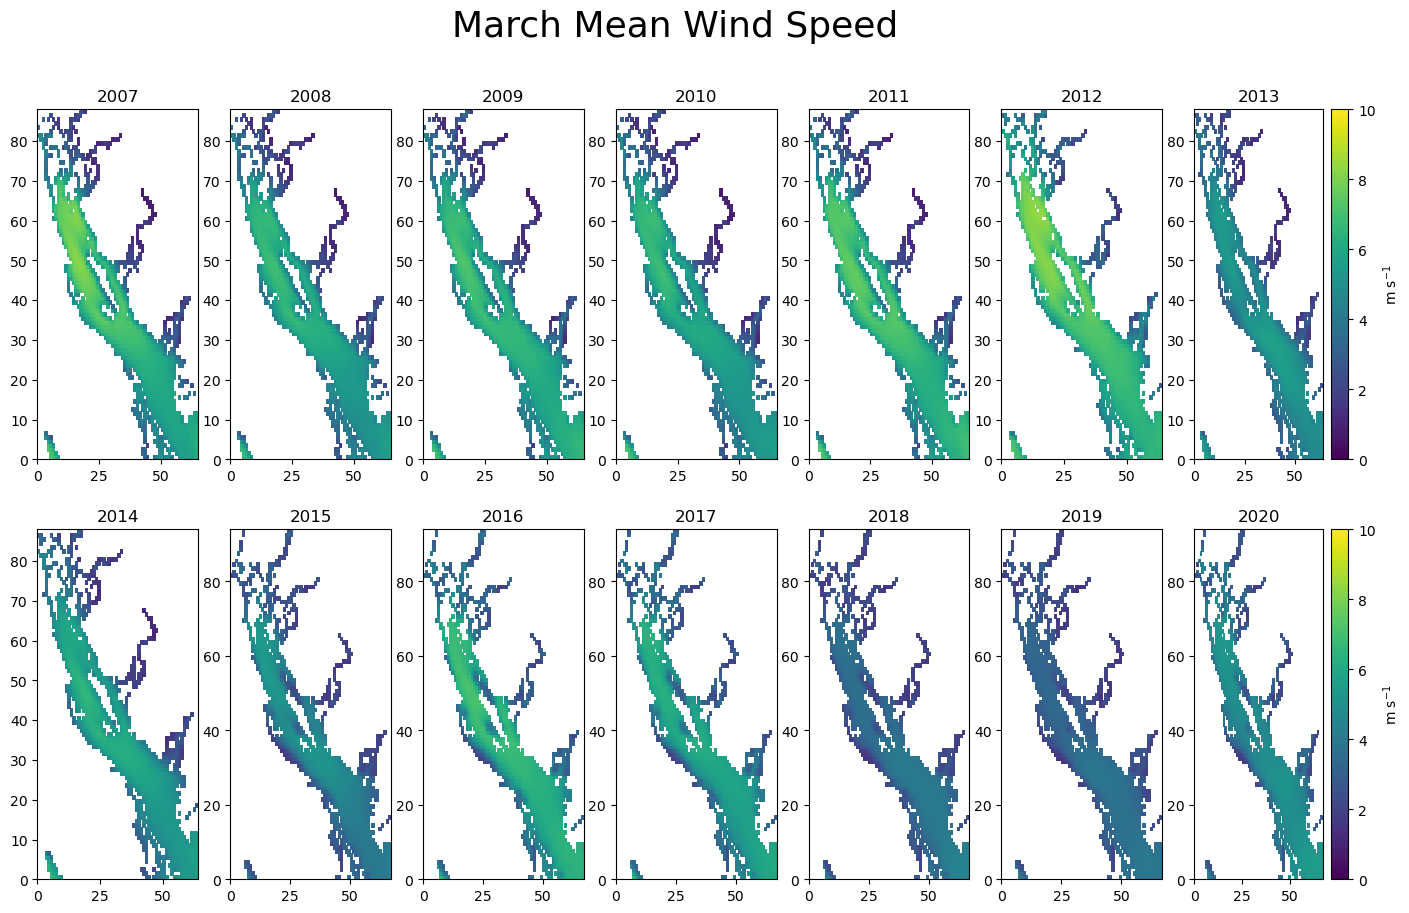

In [39]:
### PlotMarch winds
fig,ax=plt.subplots(2,7,figsize=(17,10))

vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(mar_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(mar_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(mar_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(mar_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(mar_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(mar_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(mar_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(mar_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(mar_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(mar_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(mar_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(mar_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(mar_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(mar_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('March Mean Wind Speed',fontsize=26)

## April

In [40]:
# extract April mean wind from one of each type of file:

year=2007
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2007=(fuapr2007**2+fvapr2007**2)**(1/2)
apr_ws2007mean=np.mean(apr_ws2007,0)



year=2008
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2008=(fuapr2008**2+fvapr2008**2)**(1/2)
apr_ws2008mean=np.mean(apr_ws2008,0)



year=2009
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2009=(fuapr2009**2+fvapr2009**2)**(1/2)
apr_ws2009mean=np.mean(apr_ws2009,0)



year=2010
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2010=(fuapr2010**2+fvapr2010**2)**(1/2)
apr_ws2010mean=np.mean(apr_ws2010,0)



year=2011
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2011=(fuapr2011**2+fvapr2011**2)**(1/2)
apr_ws2011mean=np.mean(apr_ws2011,0)



year=2012
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2012=(fuapr2012**2+fvapr2012**2)**(1/2)
apr_ws2012mean=np.mean(apr_ws2012,0)


year=2013
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2013=(fuapr2013**2+fvapr2013**2)**(1/2)
apr_ws2013mean=np.mean(apr_ws2013,0)



year=2014
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2014=(fuapr2014**2+fvapr2014**2)**(1/2)
apr_ws2014mean=np.mean(apr_ws2014,0)



year=2015
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2015=(fuapr2015**2+fvapr2015**2)**(1/2)
apr_ws2015mean=np.mean(apr_ws2015,0)



year=2016
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2016=(fuapr2016**2+fvapr2016**2)**(1/2)
apr_ws2016mean=np.mean(apr_ws2016,0)



year=2017
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2017=(fuapr2017**2+fvapr2017**2)**(1/2)
apr_ws2017mean=np.mean(apr_ws2017,0)



year=2018
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2018=(fuapr2018**2+fvapr2018**2)**(1/2)
apr_ws2018mean=np.mean(apr_ws2018,0)



year=2019
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2019=(fuapr2019**2+fvapr2019**2)**(1/2)
apr_ws2019mean=np.mean(apr_ws2019,0)



year=2020
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2020=(fuapr2020**2+fvapr2020**2)**(1/2)
apr_ws2020mean=np.mean(apr_ws2020,0)


Text(0.5, 0.98, 'April Mean Wind Speed')

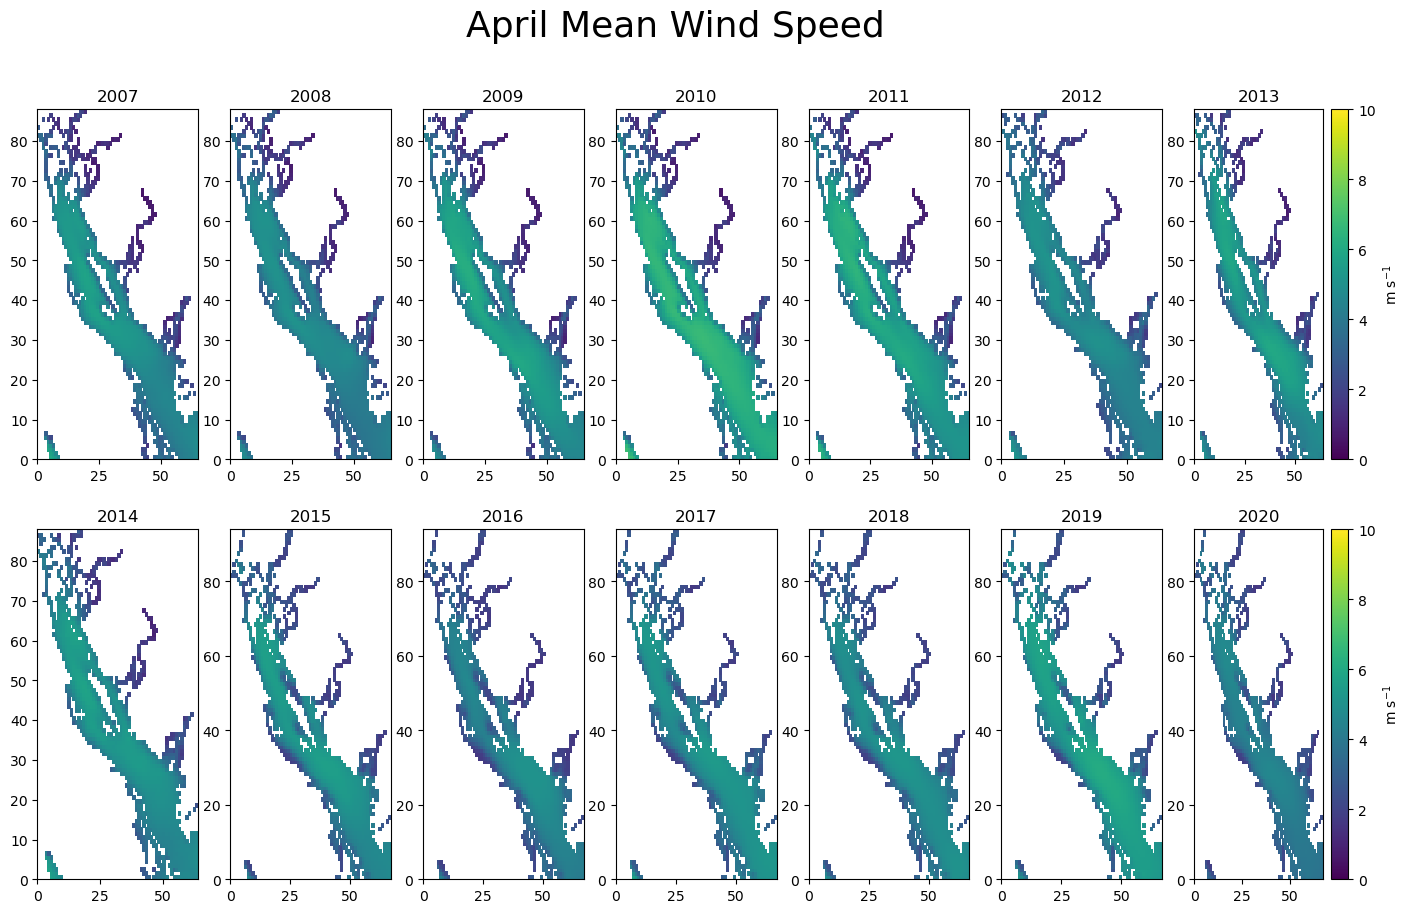

In [41]:
### Plot April winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(apr_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(apr_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(apr_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(apr_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(apr_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(apr_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(apr_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(apr_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(apr_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(apr_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(apr_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(apr_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(apr_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(apr_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('April Mean Wind Speed',fontsize=26)

In [42]:
Apr2007=np.nanmean(apr_ws2007mean)
Apr2008=np.nanmean(apr_ws2008mean)
Apr2009=np.nanmean(apr_ws2009mean)
Apr2010=np.nanmean(apr_ws2010mean)
Apr2011=np.nanmean(apr_ws2011mean)
Apr2012=np.nanmean(apr_ws2012mean)
Apr2013=np.nanmean(apr_ws2013mean)
Apr2014=np.nanmean(apr_ws2014mean)
Apr2015=np.nanmean(apr_ws2015mean)
Apr2016=np.nanmean(apr_ws2016mean)
Apr2017=np.nanmean(apr_ws2017mean)
Apr2018=np.nanmean(apr_ws2018mean)
Apr2019=np.nanmean(apr_ws2019mean)
Apr2020=np.nanmean(apr_ws2020mean)

## May

In [43]:
# extract May mean wind from one of each type of file:

year=2007
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2007=(fumay2007**2+fvmay2007**2)**(1/2)
may_ws2007mean=np.mean(may_ws2007,0)



year=2008
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2008=(fumay2008**2+fvmay2008**2)**(1/2)
may_ws2008mean=np.mean(may_ws2008,0)



year=2009
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2009=(fumay2009**2+fvmay2009**2)**(1/2)
may_ws2009mean=np.mean(may_ws2009,0)



year=2010
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2010=(fumay2010**2+fvmay2010**2)**(1/2)
may_ws2010mean=np.mean(may_ws2010,0)



year=2011
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2011=(fumay2011**2+fvmay2011**2)**(1/2)
may_ws2011mean=np.mean(may_ws2011,0)



year=2012
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2012=(fumay2012**2+fvmay2012**2)**(1/2)
may_ws2012mean=np.mean(may_ws2012,0)



year=2013
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2013=(fumay2013**2+fvmay2013**2)**(1/2)
may_ws2013mean=np.mean(may_ws2013,0)



year=2014
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2014=(fumay2014**2+fvmay2014**2)**(1/2)
may_ws2014mean=np.mean(may_ws2014,0)



year=2015
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2015=(fumay2015**2+fvmay2015**2)**(1/2)
may_ws2015mean=np.mean(may_ws2015,0)



year=2016
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2016=(fumay2016**2+fvmay2016**2)**(1/2)
may_ws2016mean=np.mean(may_ws2016,0)



year=2017
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2017=(fumay2017**2+fvmay2017**2)**(1/2)
may_ws2017mean=np.mean(may_ws2017,0)



year=2018
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2018=(fumay2018**2+fvmay2018**2)**(1/2)
may_ws2018mean=np.mean(may_ws2018,0)



year=2019
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2019=(fumay2019**2+fvmay2019**2)**(1/2)
may_ws2019mean=np.mean(may_ws2019,0)



year=2020
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2020=(fumay2020**2+fvmay2020**2)**(1/2)
may_ws2020mean=np.mean(may_ws2020,0)


Text(0.5, 0.98, 'May Mean Wind Speed')

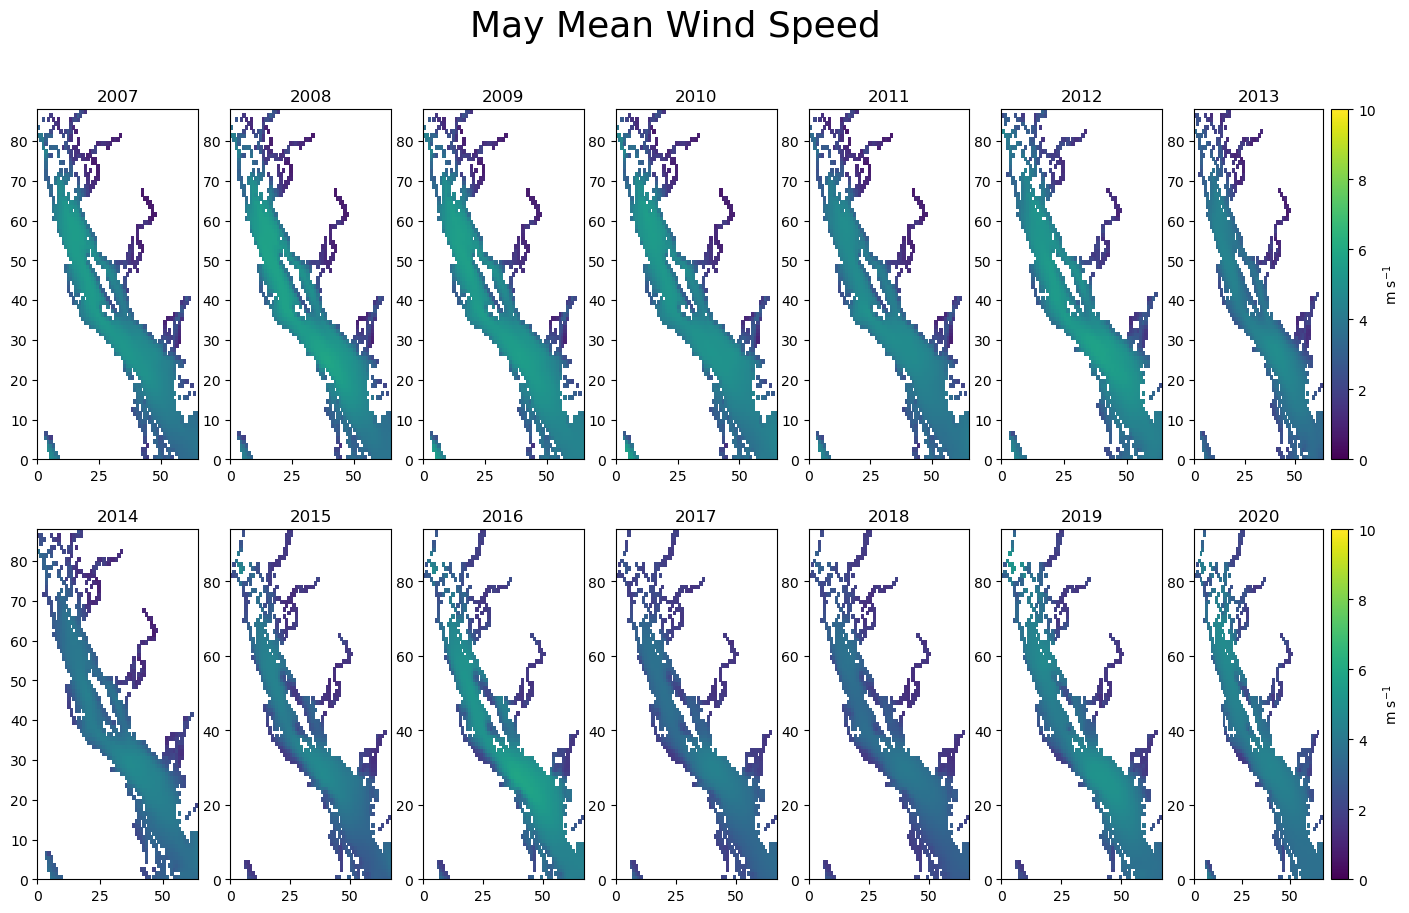

In [44]:
### Plot May winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(may_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(may_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(may_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(may_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(may_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(may_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(may_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(may_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(may_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(may_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(may_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(may_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(may_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(may_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('May Mean Wind Speed',fontsize=26)

In [45]:
May2007=np.nanmean(may_ws2007mean)
May2008=np.nanmean(may_ws2008mean)
May2009=np.nanmean(may_ws2009mean)
May2010=np.nanmean(may_ws2010mean)
May2011=np.nanmean(may_ws2011mean)
May2012=np.nanmean(may_ws2012mean)
May2013=np.nanmean(may_ws2013mean)
May2014=np.nanmean(may_ws2014mean)
May2015=np.nanmean(may_ws2015mean)
May2016=np.nanmean(may_ws2016mean)
May2017=np.nanmean(may_ws2017mean)
May2018=np.nanmean(may_ws2018mean)
May2019=np.nanmean(may_ws2019mean)
May2020=np.nanmean(may_ws2020mean)

## June

In [47]:
# extract June mean wind from one of each type of file:

year=2007
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2007=(fujun2007**2+fvjun2007**2)**(1/2)
jun_ws2007mean=np.mean(jun_ws2007,0)



year=2008
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2008=(fujun2008**2+fvjun2008**2)**(1/2)
jun_ws2008mean=np.mean(jun_ws2008,0)



year=2009
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2009=(fujun2009**2+fvjun2009**2)**(1/2)
jun_ws2009mean=np.mean(jun_ws2009,0)



year=2010
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2010=(fujun2010**2+fvjun2010**2)**(1/2)
jun_ws2010mean=np.mean(jun_ws2010,0)



year=2011
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2011=(fujun2011**2+fvjun2011**2)**(1/2)
jun_ws2011mean=np.mean(jun_ws2011,0)



year=2012
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2012=(fujun2012**2+fvjun2012**2)**(1/2)
jun_ws2012mean=np.mean(jun_ws2012,0)



year=2013
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2013=(fujun2013**2+fvjun2013**2)**(1/2)
jun_ws2013mean=np.mean(jun_ws2013,0)



year=2014
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2014=(fujun2014**2+fvjun2014**2)**(1/2)
jun_ws2014mean=np.mean(jun_ws2014,0)



year=2015
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2015=(fujun2015**2+fvjun2015**2)**(1/2)
jun_ws2015mean=np.mean(jun_ws2015,0)



year=2016
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2016=(fujun2016**2+fvjun2016**2)**(1/2)
jun_ws2016mean=np.mean(jun_ws2016,0)



year=2017
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2017=(fujun2017**2+fvjun2017**2)**(1/2)
jun_ws2017mean=np.mean(jun_ws2017,0)



year=2018
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2018=(fujun2018**2+fvjun2018**2)**(1/2)
jun_ws2018mean=np.mean(jun_ws2018,0)



year=2019
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2019=(fujun2019**2+fvjun2019**2)**(1/2)
jun_ws2019mean=np.mean(jun_ws2019,0)



year=2020
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2020=(fujun2020**2+fvjun2020**2)**(1/2)
jun_ws2020mean=np.mean(jun_ws2020,0)


Text(0.5, 0.98, 'June Mean Wind Speed')

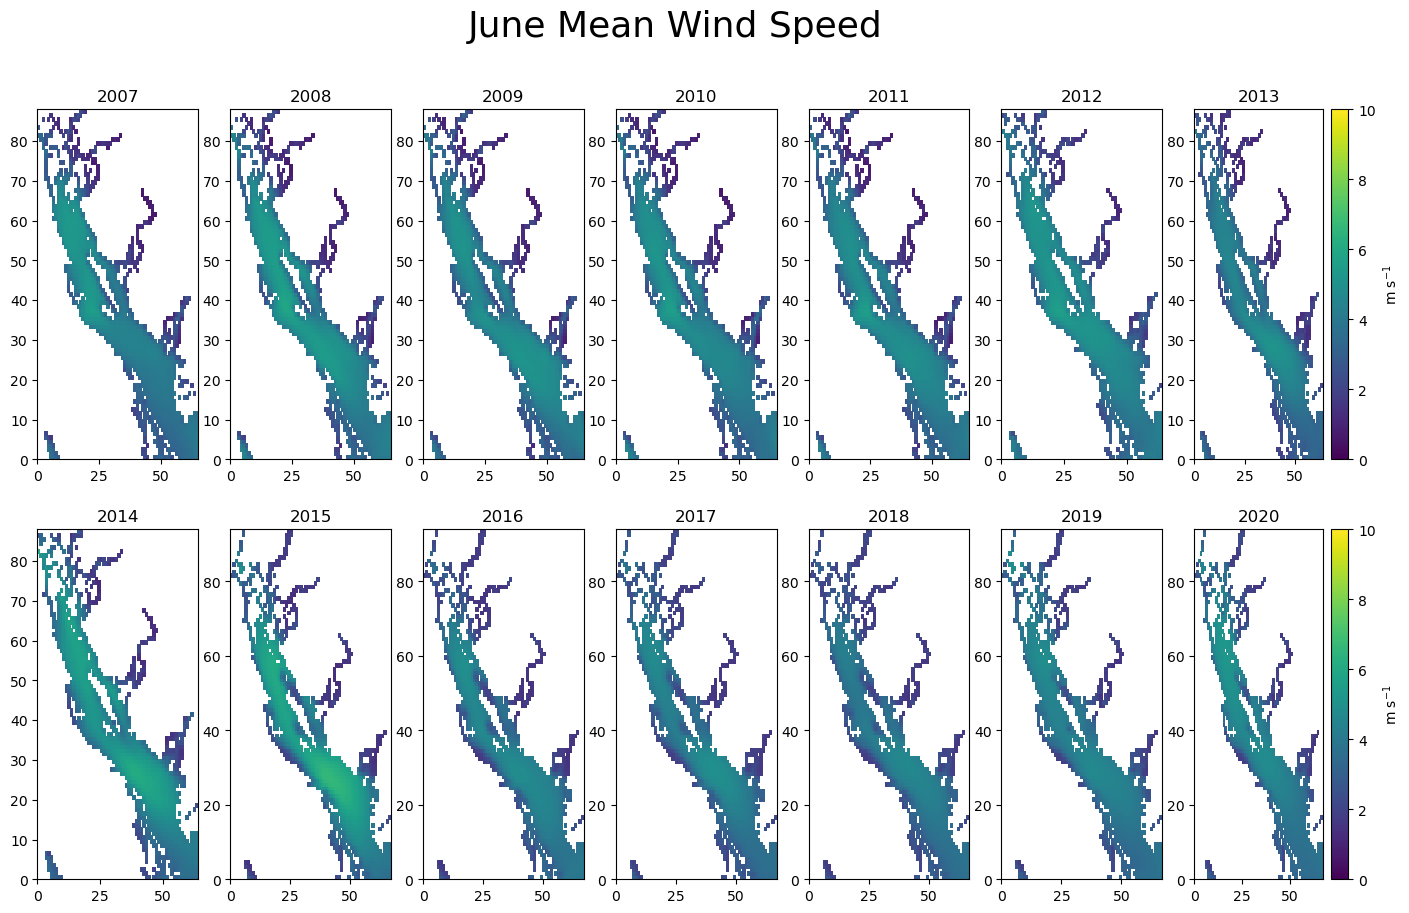

In [48]:
### Plot June winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jun_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jun_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jun_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jun_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jun_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jun_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jun_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jun_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jun_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jun_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jun_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jun_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jun_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jun_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('June Mean Wind Speed',fontsize=26)

In [49]:
Jun2007=np.nanmean(jun_ws2007mean)
Jun2008=np.nanmean(jun_ws2008mean)
Jun2009=np.nanmean(jun_ws2009mean)
Jun2010=np.nanmean(jun_ws2010mean)
Jun2011=np.nanmean(jun_ws2011mean)
Jun2012=np.nanmean(jun_ws2012mean)
Jun2013=np.nanmean(jun_ws2013mean)
Jun2014=np.nanmean(jun_ws2014mean)
Jun2015=np.nanmean(jun_ws2015mean)
Jun2016=np.nanmean(jun_ws2016mean)
Jun2017=np.nanmean(jun_ws2017mean)
Jun2018=np.nanmean(jun_ws2018mean)
Jun2019=np.nanmean(jun_ws2019mean)
Jun2020=np.nanmean(jun_ws2020mean)

## July

In [51]:
# extract July mean wind from one of each type of file:

year=2007
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2007=(fujul2007**2+fvjul2007**2)**(1/2)
jul_ws2007mean=np.mean(jul_ws2007,0)



year=2008
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2008=(fujul2008**2+fvjul2008**2)**(1/2)
jul_ws2008mean=np.mean(jun_ws2008,0)



year=2009
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2009=(fujul2009**2+fvjul2009**2)**(1/2)
jul_ws2009mean=np.mean(jun_ws2009,0)



year=2010
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2010=(fujul2010**2+fvjul2010**2)**(1/2)
jul_ws2010mean=np.mean(jun_ws2010,0)



year=2011
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2011=(fujul2011**2+fvjul2011**2)**(1/2)
jul_ws2011mean=np.mean(jun_ws2011,0)



year=2012
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2012=(fujul2012**2+fvjul2012**2)**(1/2)
jul_ws2012mean=np.mean(jun_ws2012,0)



year=2013
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2013=(fujul2013**2+fvjul2013**2)**(1/2)
jul_ws2013mean=np.mean(jun_ws2013,0)



year=2014
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2014=(fujul2014**2+fvjul2014**2)**(1/2)
jul_ws2014mean=np.mean(jun_ws2014,0)



year=2015
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2015=(fujul2015**2+fvjul2015**2)**(1/2)
jul_ws2015mean=np.mean(jun_ws2015,0)



year=2016
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2016=(fujul2016**2+fvjul2016**2)**(1/2)
jul_ws2016mean=np.mean(jun_ws2016,0)



year=2017
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2017=(fujul2017**2+fvjul2017**2)**(1/2)
jul_ws2017mean=np.mean(jun_ws2017,0)



year=2018
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2018=(fujul2018**2+fvjul2018**2)**(1/2)
jul_ws2018mean=np.mean(jun_ws2018,0)



year=2019
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2019=(fujul2019**2+fvjul2019**2)**(1/2)
jul_ws2019mean=np.mean(jun_ws2019,0)



year=2020
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2020=(fujul2020**2+fvjul2020**2)**(1/2)
jul_ws2020mean=np.mean(jun_ws2020,0)


Text(0.5, 0.98, 'July Mean Wind Speed')

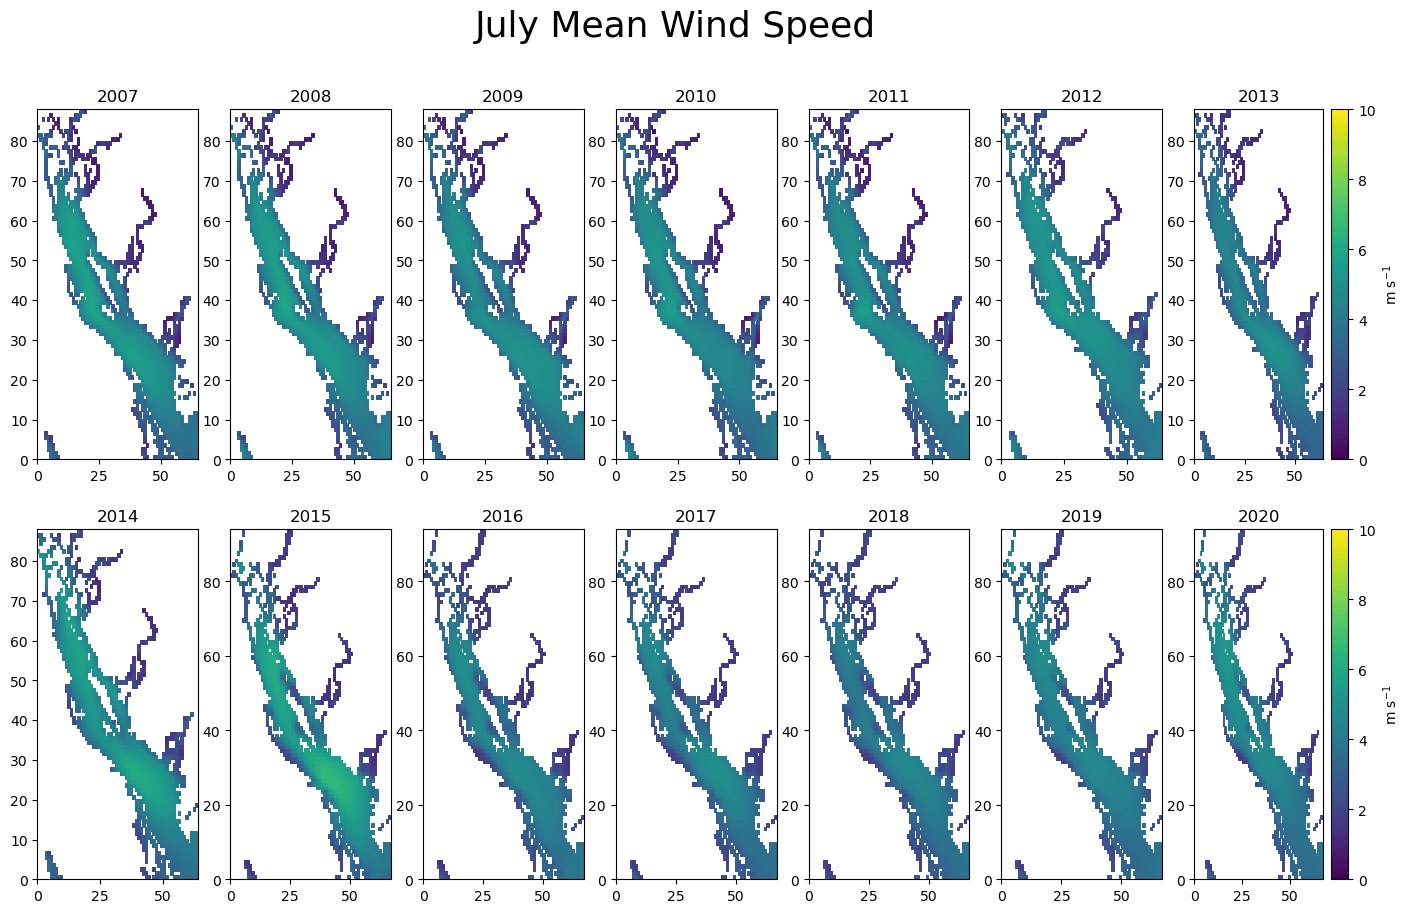

In [52]:
### Plot July winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jul_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jul_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jul_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jul_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jul_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jul_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jul_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jul_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jul_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jul_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jul_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jul_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jul_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jul_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('July Mean Wind Speed',fontsize=26)

In [53]:
Jul2007=np.nanmean(jul_ws2007mean)
Jul2008=np.nanmean(jul_ws2008mean)
Jul2009=np.nanmean(jul_ws2009mean)
Jul2010=np.nanmean(jul_ws2010mean)
Jul2011=np.nanmean(jul_ws2011mean)
Jul2012=np.nanmean(jul_ws2012mean)
Jul2013=np.nanmean(jul_ws2013mean)
Jul2014=np.nanmean(jul_ws2014mean)
Jul2015=np.nanmean(jul_ws2015mean)
Jul2016=np.nanmean(jul_ws2016mean)
Jul2017=np.nanmean(jul_ws2017mean)
Jul2018=np.nanmean(jul_ws2018mean)
Jul2019=np.nanmean(jul_ws2019mean)
Jul2020=np.nanmean(jul_ws2020mean)

## August

In [54]:
# extract August mean wind from one of each type of file:

year=2007
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2007=(fuaug2007**2+fvaug2007**2)**(1/2)
aug_ws2007mean=np.mean(aug_ws2007,0)



year=2008
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2008=(fuaug2008**2+fvaug2008**2)**(1/2)
aug_ws2008mean=np.mean(aug_ws2008,0)



year=2009
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2009=(fuaug2009**2+fvaug2009**2)**(1/2)
aug_ws2009mean=np.mean(aug_ws2009,0)



year=2010
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2010=(fuaug2010**2+fvaug2010**2)**(1/2)
aug_ws2010mean=np.mean(aug_ws2010,0)



year=2011
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2011=(fuaug2011**2+fvaug2011**2)**(1/2)
aug_ws2011mean=np.mean(aug_ws2011,0)



year=2012
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2012=(fuaug2012**2+fvaug2012**2)**(1/2)
aug_ws2012mean=np.mean(aug_ws2012,0)



year=2013
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2013=(fuaug2013**2+fvaug2013**2)**(1/2)
aug_ws2013mean=np.mean(aug_ws2013,0)



year=2014
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2014=(fuaug2014**2+fvaug2014**2)**(1/2)
aug_ws2014mean=np.mean(aug_ws2014,0)



year=2015
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2015=(fuaug2015**2+fvaug2015**2)**(1/2)
aug_ws2015mean=np.mean(aug_ws2015,0)



year=2016
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2016=(fuaug2016**2+fvaug2016**2)**(1/2)
aug_ws2016mean=np.mean(aug_ws2016,0)



year=2017
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2017=(fuaug2017**2+fvaug2017**2)**(1/2)
aug_ws2017mean=np.mean(aug_ws2017,0)


year=2018
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2018=(fuaug2018**2+fvaug2018**2)**(1/2)
aug_ws2018mean=np.mean(aug_ws2018,0)



year=2019
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2019=(fuaug2019**2+fvaug2019**2)**(1/2)
aug_ws2019mean=np.mean(aug_ws2019,0)



year=2020
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2020=(fuaug2020**2+fvaug2020**2)**(1/2)
aug_ws2020mean=np.mean(aug_ws2020,0)


Text(0.5, 0.98, 'August Mean Wind Speed')

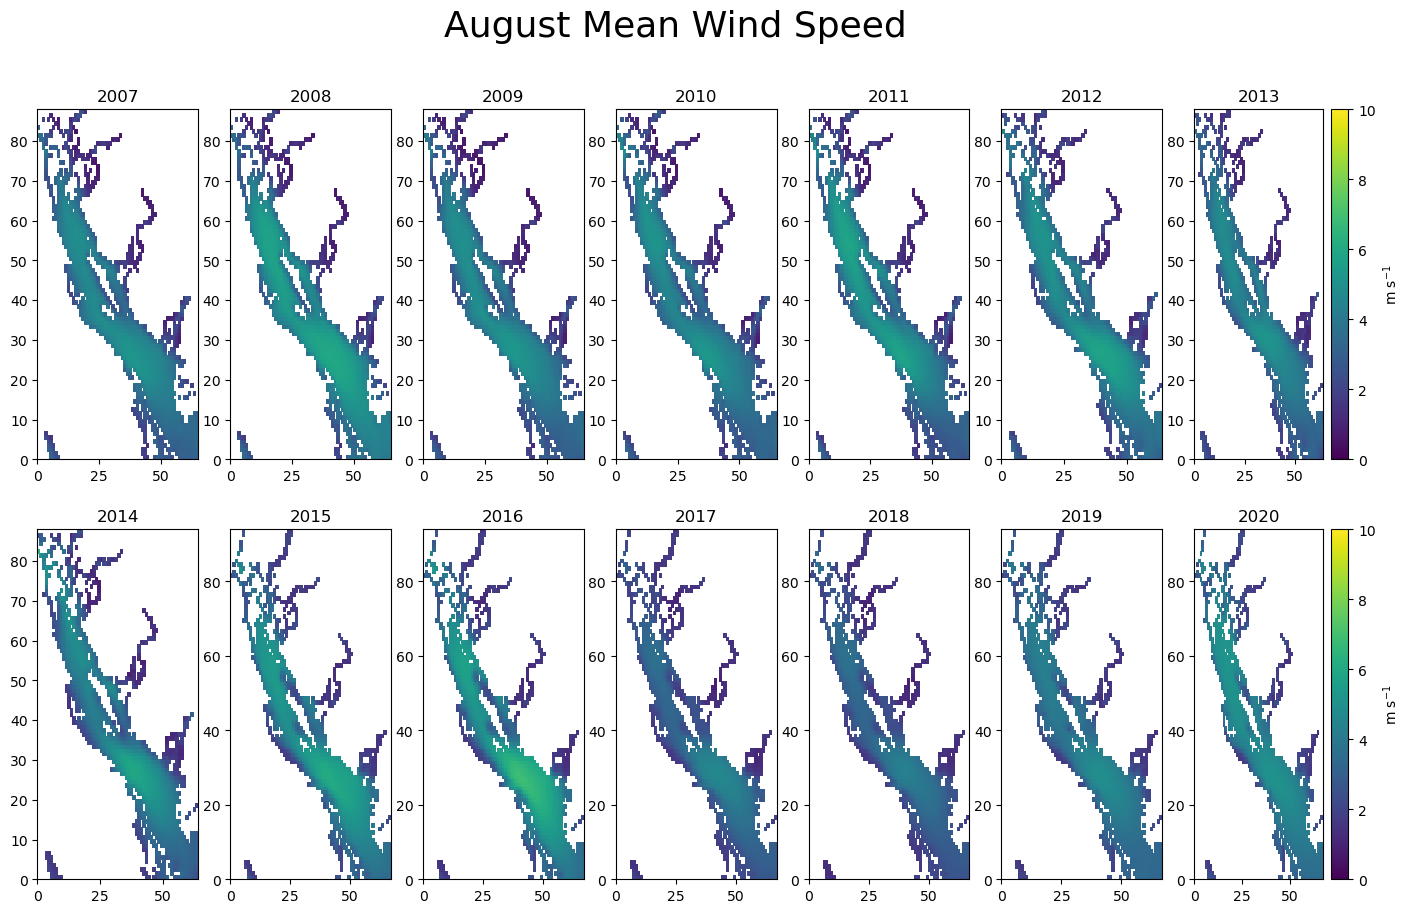

In [55]:
### Plot August winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(aug_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(aug_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(aug_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(aug_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(aug_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(aug_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(aug_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(aug_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(aug_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(aug_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(aug_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(aug_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(aug_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(aug_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('August Mean Wind Speed',fontsize=26)

In [56]:
Aug2007=np.nanmean(aug_ws2007mean)
Aug2008=np.nanmean(aug_ws2008mean)
Aug2009=np.nanmean(aug_ws2009mean)
Aug2010=np.nanmean(aug_ws2010mean)
Aug2011=np.nanmean(aug_ws2011mean)
Aug2012=np.nanmean(aug_ws2012mean)
Aug2013=np.nanmean(aug_ws2013mean)
Aug2014=np.nanmean(aug_ws2014mean)
Aug2015=np.nanmean(aug_ws2015mean)
Aug2016=np.nanmean(aug_ws2016mean)
Aug2017=np.nanmean(aug_ws2017mean)
Aug2018=np.nanmean(aug_ws2018mean)
Aug2019=np.nanmean(aug_ws2019mean)
Aug2020=np.nanmean(aug_ws2020mean)

## September

In [57]:
# extract September mean wind from one of each type of file:

year=2007
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2007=(fusep2007**2+fvsep2007**2)**(1/2)
sep_ws2007mean=np.mean(sep_ws2007,0)



year=2008
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2008=(fusep2008**2+fvsep2008**2)**(1/2)
sep_ws2008mean=np.mean(sep_ws2008,0)



year=2009
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2009=(fusep2009**2+fvsep2009**2)**(1/2)
sep_ws2009mean=np.mean(sep_ws2009,0)



year=2010
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2010=(fusep2010**2+fvsep2010**2)**(1/2)
sep_ws2010mean=np.mean(sep_ws2010,0)


year=2011
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,22),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2011=(fusep2011**2+fvsep2011**2)**(1/2)
sep_ws2011mean=np.mean(sep_ws2011,0)



year=2012
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2012=(fusep2012**2+fvsep2012**2)**(1/2)
sep_ws2012mean=np.mean(sep_ws2012,0)



year=2013
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2013=(fusep2013**2+fvsep2013**2)**(1/2)
sep_ws2013mean=np.mean(sep_ws2013,0)



year=2014
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2014=(fusep2014**2+fvsep2014**2)**(1/2)
sep_ws2014mean=np.mean(sep_ws2014,0)



year=2015
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2015=(fusep2015**2+fvsep2015**2)**(1/2)
sep_ws2015mean=np.mean(sep_ws2015,0)



year=2016
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2016=(fusep2016**2+fvsep2016**2)**(1/2)
sep_ws2016mean=np.mean(sep_ws2016,0)



year=2017
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2017=(fusep2017**2+fvsep2017**2)**(1/2)
sep_ws2017mean=np.mean(sep_ws2017,0)


year=2018
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2018=(fusep2018**2+fvsep2018**2)**(1/2)
sep_ws2018mean=np.mean(sep_ws2018,0)



year=2019
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2019=(fusep2019**2+fvsep2019**2)**(1/2)
sep_ws2019mean=np.mean(sep_ws2019,0)



year=2020
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2020=(fusep2020**2+fvsep2020**2)**(1/2)
sep_ws2020mean=np.mean(sep_ws2020,0)


Text(0.5, 0.98, 'September Mean Wind Speed')

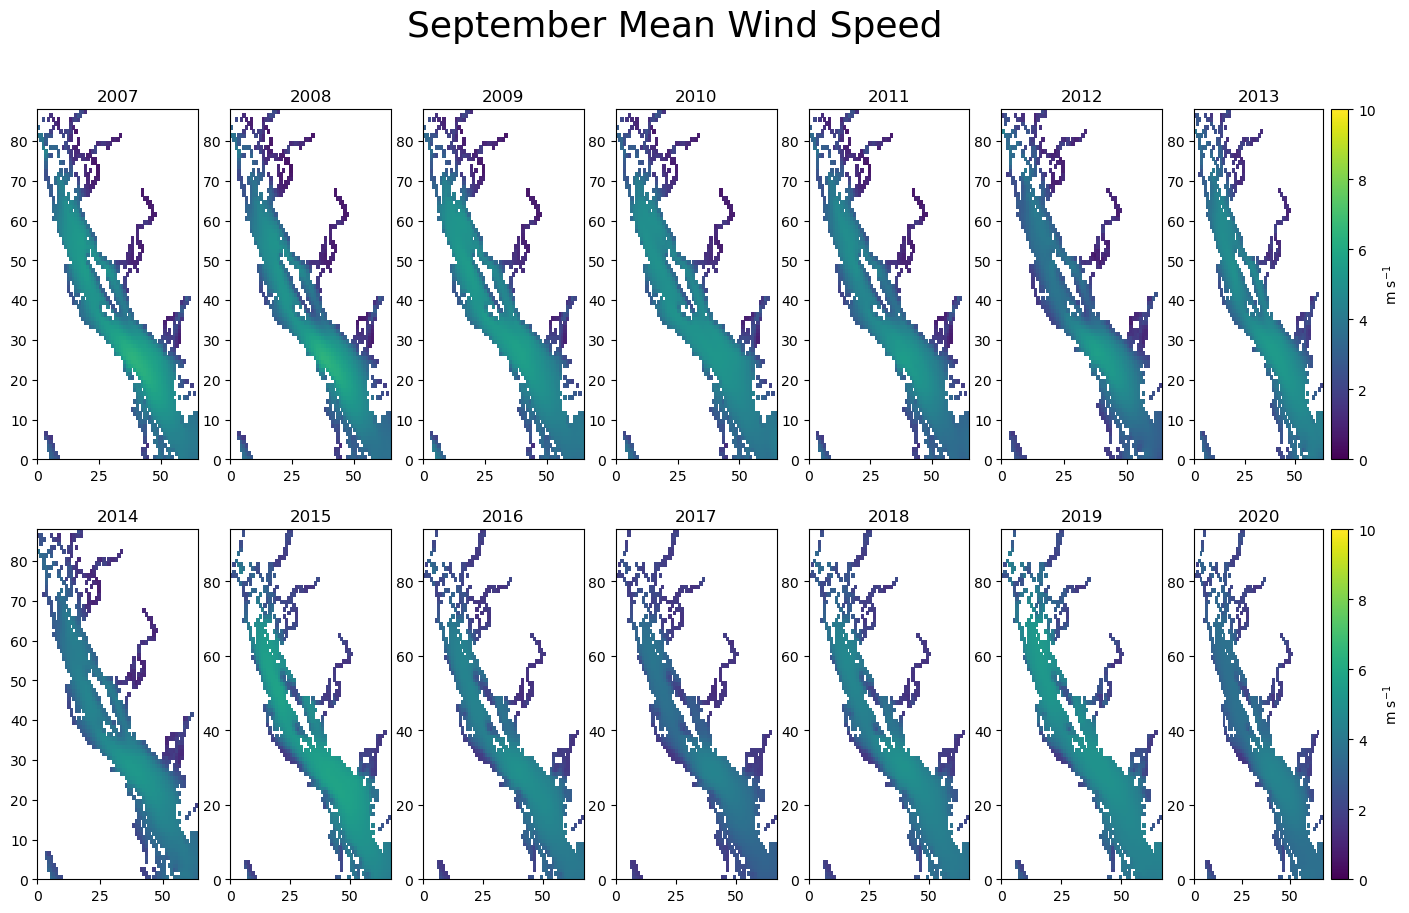

In [58]:
### Plot September winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(sep_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(sep_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(sep_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(sep_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(sep_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(sep_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(sep_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(sep_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(sep_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(sep_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(sep_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(sep_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(sep_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(sep_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('September Mean Wind Speed',fontsize=26)

In [60]:
Sep2007=np.nanmean(sep_ws2007mean)
Sep2008=np.nanmean(sep_ws2008mean)
Sep2009=np.nanmean(sep_ws2009mean)
Sep2010=np.nanmean(sep_ws2010mean)
Sep2011=np.nanmean(sep_ws2011mean)
Sep2012=np.nanmean(sep_ws2012mean)
Sep2013=np.nanmean(sep_ws2013mean)
Sep2014=np.nanmean(sep_ws2014mean)
Sep2015=np.nanmean(sep_ws2015mean)
Sep2016=np.nanmean(sep_ws2016mean)
Sep2017=np.nanmean(sep_ws2017mean)
Sep2018=np.nanmean(sep_ws2018mean)
Sep2019=np.nanmean(sep_ws2019mean)
Sep2020=np.nanmean(sep_ws2020mean)

## October

In [61]:
# extract October mean wind from one of each type of file:

year=2007
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2007=(fuoct2007**2+fvoct2007**2)**(1/2)
oct_ws2007mean=np.mean(oct_ws2007,0)



year=2008
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2008=(fuoct2008**2+fvoct2008**2)**(1/2)
oct_ws2008mean=np.mean(oct_ws2008,0)



year=2009
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2009=(fuoct2009**2+fvoct2009**2)**(1/2)
oct_ws2009mean=np.mean(oct_ws2009,0)



year=2010
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2010=(fuoct2010**2+fvoct2010**2)**(1/2)
oct_ws2010mean=np.mean(oct_ws2010,0)



year=2011
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2011=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2011=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2011=(fuoct2011**2+fvoct2011**2)**(1/2)
oct_ws2011mean=np.mean(oct_ws2011,0)



year=2012
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2012=(fuoct2012**2+fvoct2012**2)**(1/2)
oct_ws2012mean=np.mean(oct_ws2012,0)



year=2013
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2013=(fuoct2013**2+fvoct2013**2)**(1/2)
oct_ws2013mean=np.mean(oct_ws2013,0)



year=2014
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2014=(fuoct2014**2+fvoct2014**2)**(1/2)
oct_ws2014mean=np.mean(oct_ws2014,0)



year=2015
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2015=(fuoct2015**2+fvoct2015**2)**(1/2)
oct_ws2015mean=np.mean(oct_ws2015,0)



year=2016
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2016=(fuoct2016**2+fvoct2016**2)**(1/2)
oct_ws2016mean=np.mean(oct_ws2016,0)



year=2017
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2017=(fuoct2017**2+fvoct2017**2)**(1/2)
oct_ws2017mean=np.mean(oct_ws2017,0)



year=2018
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2018=(fuoct2018**2+fvoct2018**2)**(1/2)
oct_ws2018mean=np.mean(oct_ws2018,0)



year=2019
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2019=(fuoct2019**2+fvoct2019**2)**(1/2)
oct_ws2019mean=np.mean(oct_ws2019,0)



year=2020
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2020=(fuoct2020**2+fvoct2020**2)**(1/2)
oct_ws2020mean=np.mean(oct_ws2020,0)


Text(0.5, 0.98, 'October Mean Wind Speed')

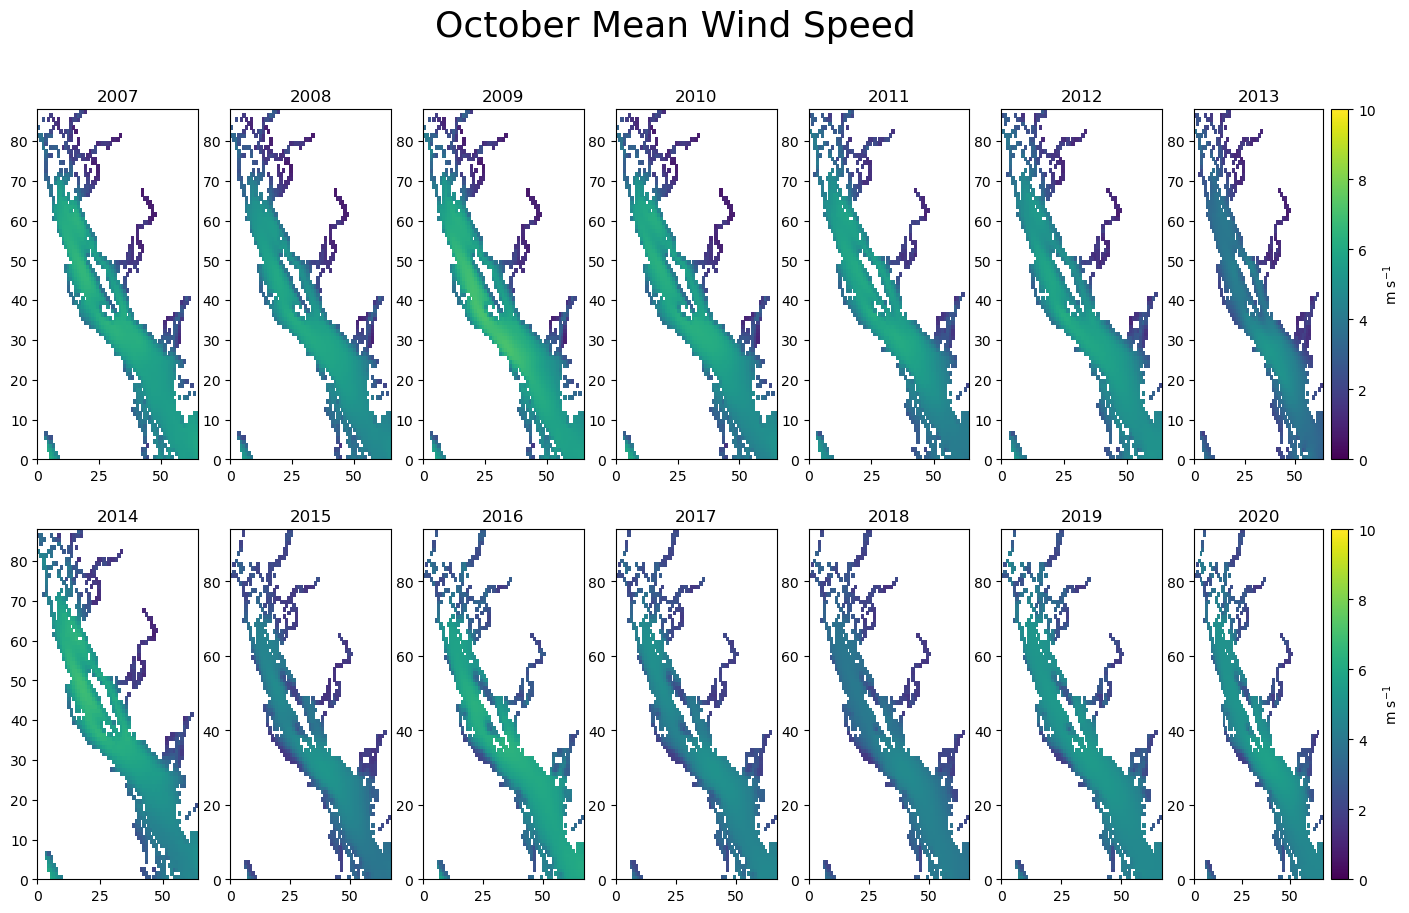

In [62]:
### Plot October winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(oct_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(oct_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(oct_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(oct_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(oct_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(oct_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(oct_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(oct_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(oct_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(oct_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(oct_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(oct_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(oct_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(oct_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('October Mean Wind Speed',fontsize=26)

In [63]:
Oct2007=np.nanmean(oct_ws2007mean)
Oct2008=np.nanmean(oct_ws2008mean)
Oct2009=np.nanmean(oct_ws2009mean)
Oct2010=np.nanmean(oct_ws2010mean)
Oct2011=np.nanmean(oct_ws2011mean)
Oct2012=np.nanmean(oct_ws2012mean)
Oct2013=np.nanmean(oct_ws2013mean)
Oct2014=np.nanmean(oct_ws2014mean)
Oct2015=np.nanmean(oct_ws2015mean)
Oct2016=np.nanmean(oct_ws2016mean)
Oct2017=np.nanmean(oct_ws2017mean)
Oct2018=np.nanmean(oct_ws2018mean)
Oct2019=np.nanmean(oct_ws2019mean)
Oct2020=np.nanmean(oct_ws2020mean)

## November

In [64]:
# extract November mean wind from one of each type of file:

year=2007
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2007=(funov2007**2+fvnov2007**2)**(1/2)
nov_ws2007mean=np.mean(nov_ws2007,0)



year=2008
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2008=(funov2008**2+fvnov2008**2)**(1/2)
nov_ws2008mean=np.mean(nov_ws2008,0)



year=2009
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2009=(funov2009**2+fvnov2009**2)**(1/2)
nov_ws2009mean=np.mean(nov_ws2009,0)



year=2010
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2010=(funov2010**2+fvnov2010**2)**(1/2)
nov_ws2010mean=np.mean(nov_ws2010,0)



year=2011
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2011=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2011=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2011=(funov2011**2+fvnov2011**2)**(1/2)
nov_ws2011mean=np.mean(nov_ws2011,0)



year=2012
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2012=(funov2012**2+fvnov2012**2)**(1/2)
nov_ws2012mean=np.mean(nov_ws2012,0)



year=2013
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2013=(funov2013**2+fvnov2013**2)**(1/2)
nov_ws2013mean=np.mean(nov_ws2013,0)



year=2014
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,18),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2014=(funov2014**2+fvnov2014**2)**(1/2)
nov_ws2014mean=np.mean(nov_ws2014,0)



year=2015
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2015=(funov2015**2+fvnov2015**2)**(1/2)
nov_ws2015mean=np.mean(nov_ws2015,0)



year=2016
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2016=(funov2016**2+fvnov2016**2)**(1/2)
nov_ws2016mean=np.mean(nov_ws2016,0)



year=2017
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2017=(funov2017**2+fvnov2017**2)**(1/2)
nov_ws2017mean=np.mean(nov_ws2017,0)



year=2018
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2018=(funov2018**2+fvnov2018**2)**(1/2)
nov_ws2018mean=np.mean(nov_ws2018,0)



year=2019
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2019=(funov2019**2+fvnov2019**2)**(1/2)
nov_ws2019mean=np.mean(nov_ws2019,0)



year=2020
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2020=(funov2020**2+fvnov2020**2)**(1/2)
nov_ws2020mean=np.mean(nov_ws2020,0)


Text(0.5, 0.98, 'November Mean Wind Speed')

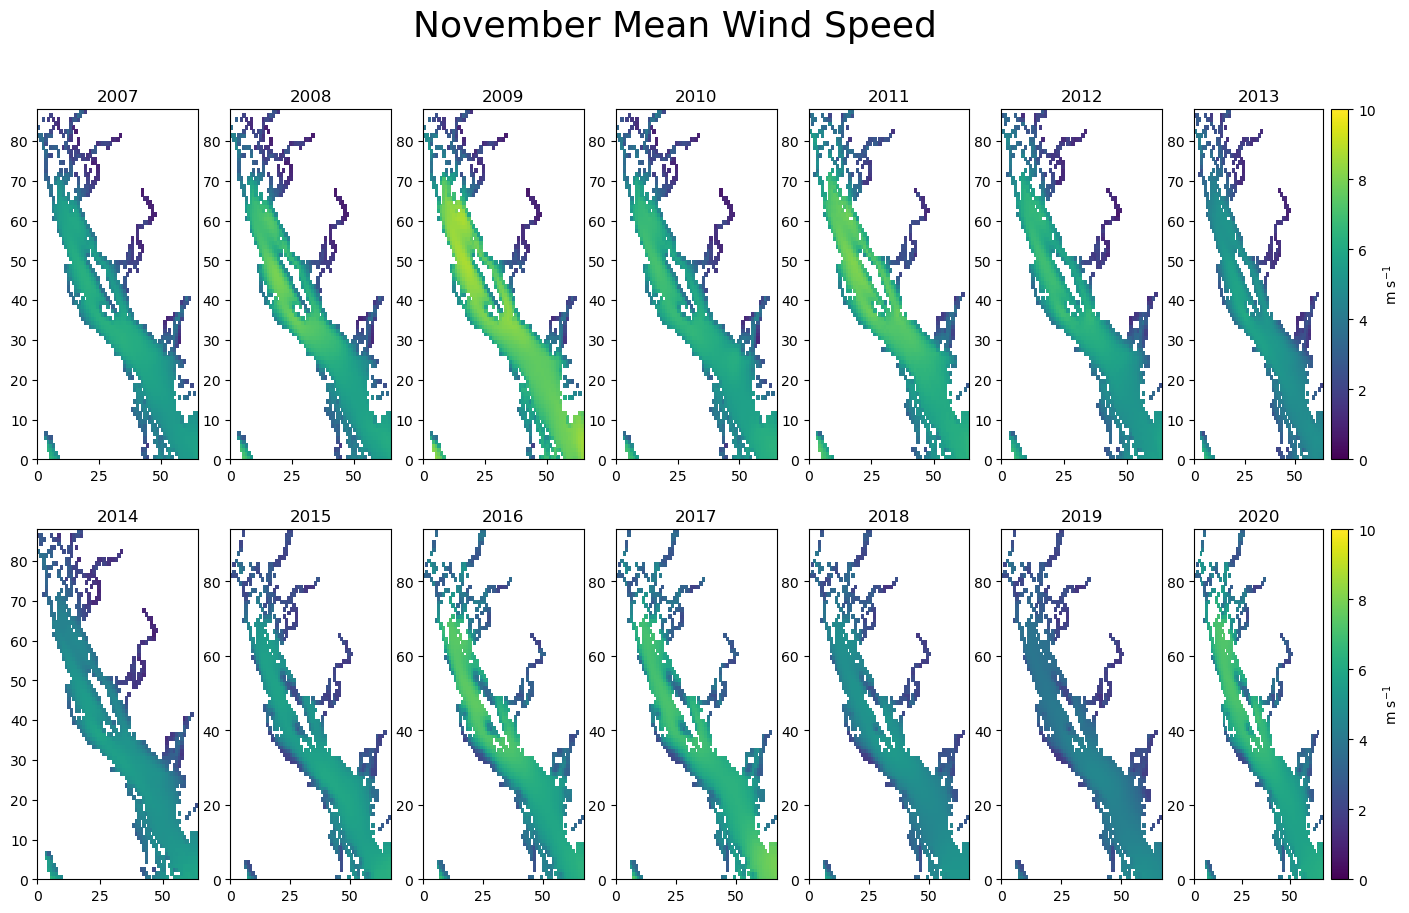

In [65]:
### Plot November winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(nov_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(nov_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(nov_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(nov_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(nov_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(nov_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(nov_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(nov_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(nov_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(nov_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(nov_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(nov_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(nov_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(nov_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('November Mean Wind Speed',fontsize=26)

In [66]:
Nov2007=np.nanmean(nov_ws2007mean)
Nov2008=np.nanmean(nov_ws2008mean)
Nov2009=np.nanmean(nov_ws2009mean)
Nov2010=np.nanmean(nov_ws2010mean)
Nov2011=np.nanmean(nov_ws2011mean)
Nov2012=np.nanmean(nov_ws2012mean)
Nov2013=np.nanmean(nov_ws2013mean)
Nov2014=np.nanmean(nov_ws2014mean)
Nov2015=np.nanmean(nov_ws2015mean)
Nov2016=np.nanmean(nov_ws2016mean)
Nov2017=np.nanmean(nov_ws2017mean)
Nov2018=np.nanmean(nov_ws2018mean)
Nov2019=np.nanmean(nov_ws2019mean)
Nov2020=np.nanmean(nov_ws2020mean)

## December

In [67]:
# extract December mean wind from one of each type of file:

year=2007
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2007=(fudec2007**2+fvdec2007**2)**(1/2)
dec_ws2007mean=np.mean(dec_ws2007,0)



year=2008
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2008=(fudec2008**2+fvdec2008**2)**(1/2)
dec_ws2008mean=np.mean(dec_ws2008,0)



year=2009
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2009=(fudec2009**2+fvdec2009**2)**(1/2)
dec_ws2009mean=np.mean(dec_ws2009,0)



year=2010
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2010=(fudec2010**2+fvdec2010**2)**(1/2)
dec_ws2010mean=np.mean(dec_ws2010,0)



year=2011
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2011=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2011=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2011=(fudec2011**2+fvdec2011**2)**(1/2)
dec_ws2011mean=np.mean(dec_ws2011,0)



year=2012
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2012=(fudec2012**2+fvdec2012**2)**(1/2)
dec_ws2012mean=np.mean(dec_ws2012,0)



year=2013
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2013=(fudec2013**2+fvdec2013**2)**(1/2)
dec_ws2013mean=np.mean(dec_ws2013,0)


#year=2014
#day=dt.datetime(year,12,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#dec_ops2014=(fu**2+fv**2)**(1/2)
#dec_ops2014mean=np.mean(dec_ops2014,0)


year=2015
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2015=xr.concat([ii['u_wind'].where(Watermask2.mask).where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2015=xr.concat([ii['v_wind'].where(Watermask2.mask).where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2015=(fudec2015**2+fvdec2015**2)**(1/2)
dec_ws2015mean=np.mean(dec_ws2015,0)



year=2016
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2016=(fudec2016**2+fvdec2016**2)**(1/2)
dec_ws2016mean=np.mean(dec_ws2016,0)



year=2017
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2017=(fudec2017**2+fvdec2017**2)**(1/2)
dec_ws2017mean=np.mean(dec_ws2017,0)



year=2018
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2018=(fudec2018**2+fvdec2018**2)**(1/2)
dec_ws2018mean=np.mean(dec_ws2018,0)


year=2019
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2019=(fudec2019**2+fvdec2019**2)**(1/2)
dec_ws2019mean=np.mean(dec_ws2019,0)



year=2020
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2020=(fudec2020**2+fvdec2020**2)**(1/2)
dec_ws2020mean=np.mean(dec_ws2020,0)


Text(0.5, 0.98, 'December Mean Wind Speed')

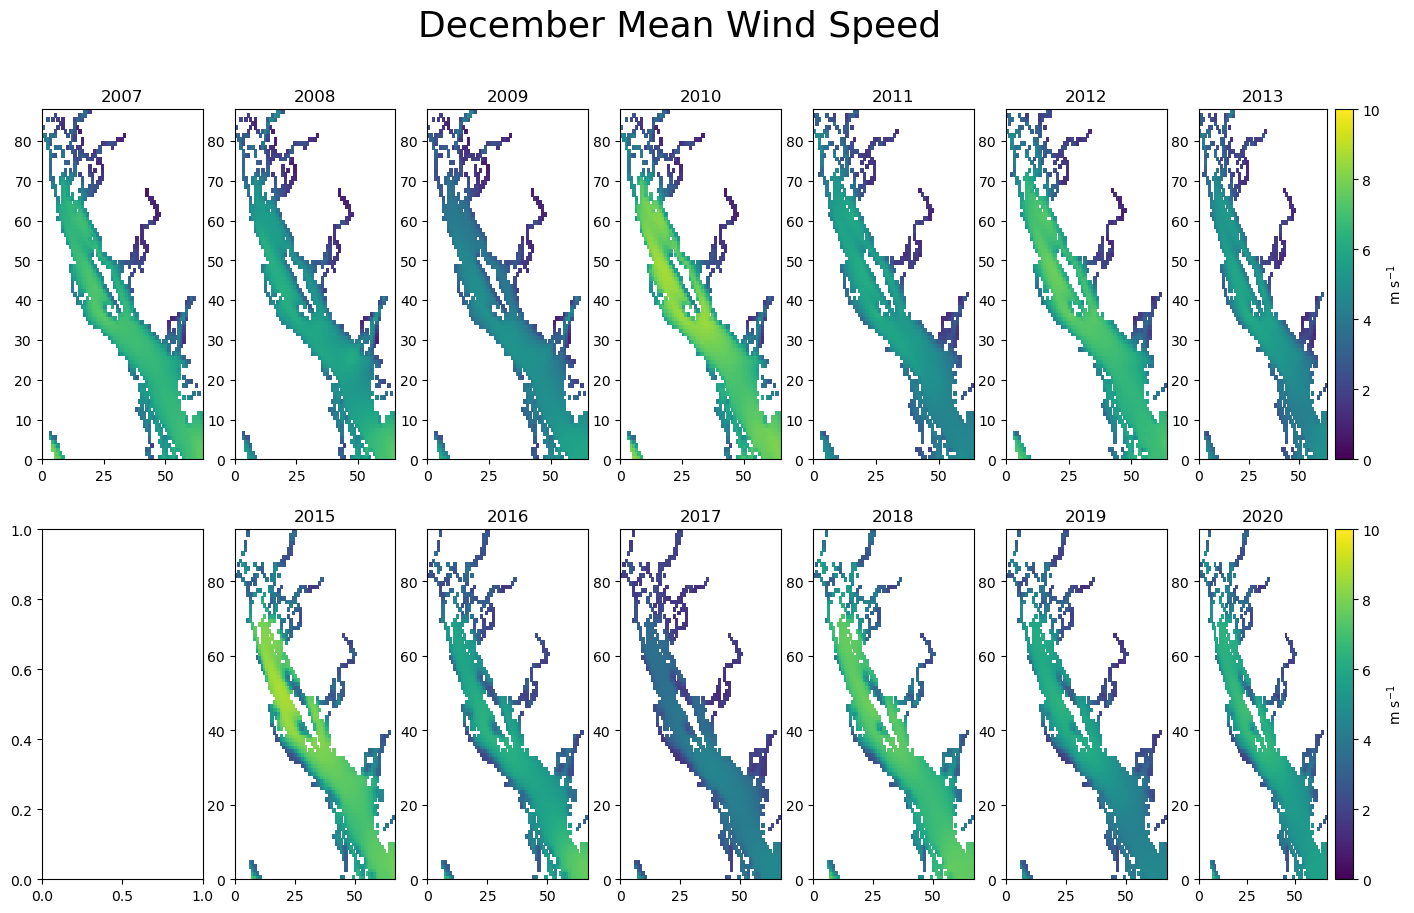

In [68]:
### Plot December winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(dec_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(dec_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(dec_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(dec_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(dec_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(dec_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(dec_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
#iax=ax[1,0]
#iax.set_title('2014')
#m=iax.pcolormesh(dec_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(dec_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(dec_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(dec_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(dec_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(dec_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(dec_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('December Mean Wind Speed',fontsize=26)

In [69]:
Dec2007=np.nanmean(dec_ws2007mean)
Dec2008=np.nanmean(dec_ws2008mean)
Dec2009=np.nanmean(dec_ws2009mean)
Dec2010=np.nanmean(dec_ws2010mean)
Dec2011=np.nanmean(dec_ws2011mean)
Dec2012=np.nanmean(dec_ws2012mean)
Dec2013=np.nanmean(dec_ws2013mean)
#Dec2014=np.nanmean(dec_gl22014mean)
Dec2015=np.nanmean(dec_ws2015mean)
Dec2016=np.nanmean(dec_ws2016mean)
Dec2017=np.nanmean(dec_ws2017mean)
Dec2018=np.nanmean(dec_ws2018mean)
Dec2019=np.nanmean(dec_ws2019mean)
Dec2020=np.nanmean(dec_ws2020mean)